In [25]:
# Imports
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.express as px
from plot_utils import plotly_template

# Define parameters
subjects = ['sub-001', 'sub-002', 'sub-003', 'sub-004',
            'sub-005', 'sub-006', 'sub-007', 'sub-008']
subjects_plot = ['sub-001', 'sub-002', 'sub-003', 'sub-004',
                 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'group']
rois = ['V1', 'V2', 'V3', 'V3AB', 'hMT+', 'LO',
        'VO', 'iIPS', 'sIPS', 'iPCS', 'sPCS', 'mPCS']
TR = 1.3

# Define folders
base_dir = '/home/mszinte/disks/meso_S/data/gaze_prf'
bids_dir = "{}".format(base_dir)
pp_dir = "{}/derivatives/pp_data".format(base_dir)
tsv_dir = '{}/{}/decode/tsv'.format(pp_dir, subject)

# General figure settings
template_specs = dict(  axes_color="rgba(0, 0, 0, 1)",
                        axes_width=2,
                        axes_font_size=13,
                        bg_col="rgba(255, 255, 255, 1)",
                        font='Arial',
                        title_font_size=15,
                        plot_width=1.5)
fig_template = plotly_template(template_specs)

In [54]:
# Subplot settings
margin_t, margin_b, margin_l, margin_r = 50, 100, 100 ,50
rows, cols = 6, 1

column_widths,row_heights = [1], [0.15,1,0.15,1,0.15,1]
sb_specs = [[{}],[{}],[{}],[{}],[{}],[{}]]
subplot_width, subplot_height = 600,200

fig_width, fig_height = 0, 0
for column_width in column_widths:fig_width += subplot_width*column_width
for row_height in row_heights: fig_height +=subplot_height*row_height
fig_width = fig_width + margin_l + margin_r
fig_height = fig_height + margin_t + margin_b

xaxis_range = [0, 159]
xaxis_tickvals = [0, 13, 36, 49, 73, 86, 109, 122, 146, 159]
xaxis_title = 'Time (seconds)'
xaxis_ticktext = []
[xaxis_ticktext.append(('{:g}'.format(val))) for val in xaxis_tickvals]

yaxis_range = [-8, 8]
yaxis_tick = 5
yaxis_tickvals = np.linspace(yaxis_range[0],yaxis_range[1],yaxis_tick)
yaxis_title = 'Decoded<br>position (dva)'
yaxis_ticktext = []
[yaxis_ticktext.append(('{:g}'.format(val))) for val in yaxis_tickvals]

x0_all = np.array([0,11,29,39,57,67,85,95,113])*TR
x1_all = np.array([10,28,38,56,66,84,94,112,122])*TR
xrefs, axrefs = ['x','x3','x5'], ['x','x3','x5']
yrefs, ayrefs = ['y','y3','y5'], ['y','y3','y5']
mot_1 = np.array([ 24*TR,  15*TR, 0.5, 0.5])
mot_2 = np.array([ 43*TR,  52*TR, 0.5, 0.5])
mot_3 = np.array([ 80*TR,  71*TR, 0.5, 0.5])
mot_4 = np.array([ 99*TR, 108*TR, 0.5, 0.5])

line_width = 2
gc_line_col = "rgba(243, 146, 0, 1)"
gc_area_col = "rgba(243, 146, 0, 0.5)"
gl_line_col = "rgba(41, 101, 44, 1)"
gl_area_col = "rgba(41, 101, 44, 0.5)"
gr_line_col = "rgba(142, 19, 84, 1)"
gr_area_col = "rgba(142, 19, 84, 0.5)"

hover = 'Time: %{x:1.2f} s<br>' + 'x: %{y:1.2f} dva'

roi = 'V1'
subject = 'sub-003'
attend_task = 'AttendBar'
attend_task_txt = 'attend-bar'
gaze_tasks = ['GazeCenter', 'GazeLeft', 'GazeRight']

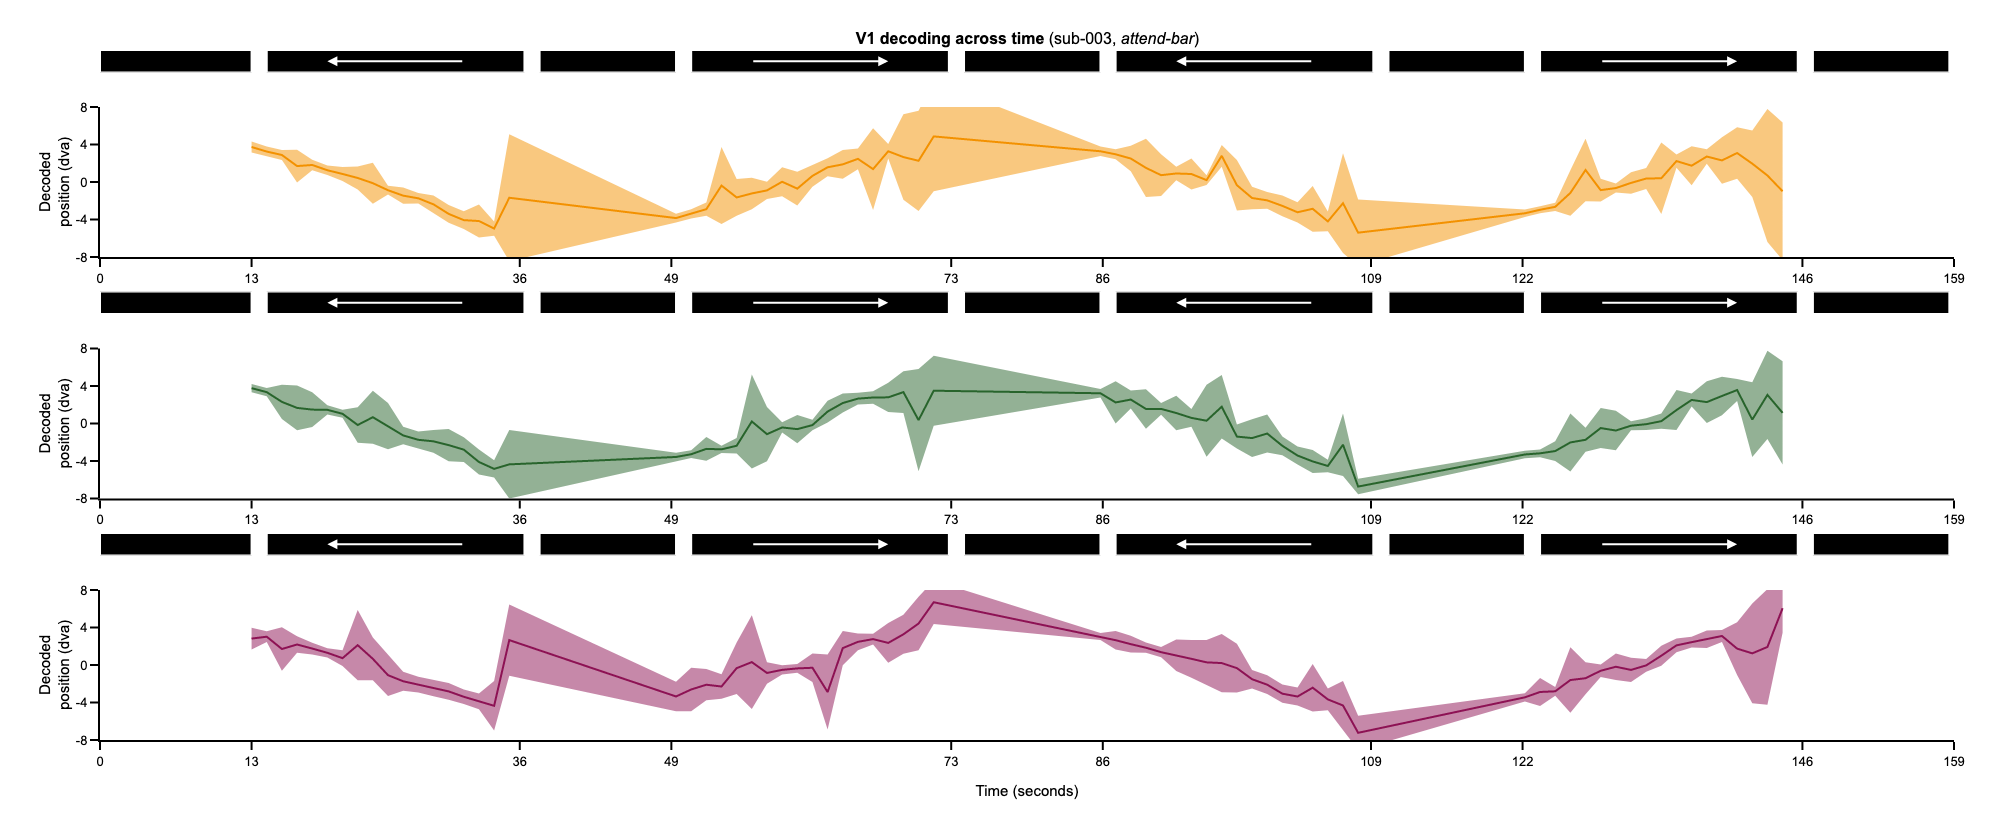

In [56]:
subplot_titles = ['<b>{} decoding across time</b> ({}, <i>{}</i>)'.format(roi, subject, attend_task_txt),
                 '','','','','','']

fig = make_subplots(rows=rows, cols=cols, specs=sb_specs, print_grid=False, vertical_spacing=0.05, horizontal_spacing=0.1,
                    column_widths=column_widths, row_heights=row_heights,  subplot_titles=subplot_titles)


for xref,yref,axref,ayref in zip(xrefs, yrefs, axrefs, ayrefs):
    for x0,x1 in zip(x0_all,x1_all):
        fig.add_shape(type='rect', xref=xref, yref=yref, x0=x0, y0=0, x1=x1, y1=1, 
                      line_width=2, fillcolor='black', line_color='white')
        
    for [coord_tp] in zip([mot_1, mot_2, mot_3, mot_4]):
        fig.add_annotation(ax=coord_tp[0], x=coord_tp[1], ay=coord_tp[2], y=coord_tp[3], 
                           xref=xref, yref=yref, axref=axref,ayref=ayref,
                           text='', showarrow=True, arrowhead=2, arrowcolor='white')
        
for gaze_task_num, gaze_task in enumerate(gaze_tasks):
    
    if gaze_task == 'GazeCenter': line_color, area_col, row = gc_line_col, gc_area_col, 2
    elif gaze_task == 'GazeLeft': line_color, area_col, row = gl_line_col, gl_area_col, 4
    elif gaze_task == 'GazeRight': line_color, area_col, row = gr_line_col, gr_area_col, 6
    
    # get data
    df_fn = "{}/{}_task-{}{}_decode_par.pkl".format(tsv_dir,subject,gaze_task,attend_task)
    df = pd.read_pickle(df_fn)
    
    x = df.loc[df.roi==roi].TR*TR
    y = df.loc[df.roi==roi].decoded_x_mean
    eb_y = df.loc[df.roi==roi].decoded_x_std
    
    fig.append_trace(go.Scatter(x=x, y=y, showlegend=False, mode='lines', line_color=line_color, line_width=line_width, connectgaps=False, name='', hovertemplate=hover), row=row, col=1)
    fig.append_trace(go.Scatter(x=x, y=y+eb_y, showlegend=False, mode='lines', fillcolor=area_col, line_width=0, connectgaps=False, hoverinfo='skip'), row=row, col=1)
    fig.append_trace(go.Scatter(x=x, y=y-eb_y, showlegend=False, mode='lines', fillcolor=area_col, line_width=0, connectgaps=False, hoverinfo='skip', fill='tonexty'), row=row, col=1)
    

for xaxis in ['xaxis','xaxis3','xaxis5']:
    exec("fig.layout.update({}_range=xaxis_range)".format(xaxis))
    exec("fig.layout.update({}_title='')".format(xaxis))
    exec("fig.layout.update({}_showticklabels=False)".format(xaxis))
    exec("fig.layout.update({}_visible=False)".format(xaxis))

for yaxis in ['yaxis','yaxis3','yaxis5']:
    exec("fig.layout.update({}_range=[0,1])".format(yaxis))
    exec("fig.layout.update({}_title='')".format(yaxis))
    exec("fig.layout.update({}_showticklabels=False)".format(yaxis))
    exec("fig.layout.update({}_visible=False)".format(yaxis))
        
for xaxis in ['xaxis2','xaxis4','xaxis6']:
    exec("fig.layout.update({}_range=xaxis_range)".format(xaxis))
    exec("fig.layout.update({}_tickvals=xaxis_tickvals)".format(xaxis))
    exec("fig.layout.update({}_ticktext=xaxis_ticktext)".format(xaxis))
    if xaxis == 'xaxis6':exec("fig.layout.update({}_title=xaxis_title)".format(xaxis))

for yaxis in ['yaxis2','yaxis4','yaxis6']:
    exec("fig.layout.update({}_range=yaxis_range)".format(yaxis))
    exec("fig.layout.update({}_tickvals=yaxis_tickvals)".format(yaxis))
    exec("fig.layout.update({}_ticktext=yaxis_ticktext)".format(yaxis))
    exec("fig.layout.update({}_title=yaxis_title)".format(yaxis))
    

# set axis
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)
        fig.update_yaxes(ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)

# set figure
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=margin_l, margin_r=margin_r, margin_t=margin_t, margin_b=margin_b,
                  legend_yanchor='top', legend_y=-0.15,legend_x=-0.05, legend_xanchor='left', legend_bgcolor='rgba(255,255,255,0)', legend_tracegroupgap=1)

        
fig.show(config={"displayModeBar": False})
#fig.write_image("{}/{}_refit_ref_index{}.pdf".format(tsv_dir, subject, type_analysis))
#fig.write_html("{}/{}_refit_ref_index{}.html".format(tsv_dir, subject, type_analysis),config={"displayModeBar": False})

- [ ] do somethint to avoid connections between parts (put Nan)
- [ ] make ticks at right time not rounded value
- [ ] check time of timeseries graph
- [ ] add predictions
- [ ] add legend of predictions
- [ ] add condition title on the left side (gaze center/ gaze left/ gaze right)
- [ ] decide what to use for error bar
- [ ] make it for all condition, ROI, and subjects
- [ ] save all figures
